In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# 1-Data Preprocessing

# Preprocessing the training the training dataset

In [4]:
# apply transformation for training set, to reduce overfitting.
# -> Image augmentation

training_datagen = ImageDataGenerator(
    rescale=1./255, # feature scaling to each pixel (val / 255)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = training_datagen.flow_from_directory(
    './dataset/training_set', # directory / path to the training dataset
    target_size=(64, 64), # final size of the image which will be fit to the Neural Network
    batch_size=32, # no. of images in each batch
    class_mode='binary' # binary or categorical
)

Found 8000 images belonging to 2 classes.


# Preprocessing the test the training dataset

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    './dataset/test_set', # directory / path to the training dataset
    target_size=(64, 64), # final size of the image which will be fit to the Neural Network
    batch_size=32, # no. of images in each batch
    class_mode='binary' # binary or categorical
)

Found 2000 images belonging to 2 classes.


# 2-Building the CNN

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
# Convolutional Layers
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32, #no. of feature detectors
        kernel_size=3, # size of the feature detector
        input_shape=[64, 64, 3], # 3 -> rgb
        activation='relu'
    )
)

In [8]:
# Pooling Layer

cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=2
    )
)

In [9]:
# Adding another Conv2D Layer
# NOTE* : no input size parameter
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32, #no. of feature detectors
        kernel_size=3, # size of the feature detector
        activation='relu'
    )
)

In [10]:
# Adding another Pooling Layer

cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=2
    )
)

# 3-Flattening

In [11]:
cnn.add(
    tf.keras.layers.Flatten()
)

# 4-Full Connection

In [12]:
# hidden layer-1
cnn.add(
    tf.keras.layers.Dense(
        units=64,
        activation='relu'
    )
)

# # hidden layer-2
# cnn.add(
#     tf.keras.layers.Dense(
#         units=128,
#         activation='relu'
#     )
# )

# 5-Output Layer

In [13]:
# output layer
cnn.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

# 6-Training the CNN

In [14]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
cnn.fit(
    x=training_set,
    y=None,
    batch_size=None,
    epochs=20,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=test_set,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

Epoch 1/20
250/250 [==============================] - 36s 140ms/step - loss: 0.6883 - accuracy: 0.5506 - val_loss: 0.6513 - val_accuracy: 0.6410
Epoch 2/20
250/250 [==============================] - 34s 136ms/step - loss: 0.6124 - accuracy: 0.6710 - val_loss: 0.5711 - val_accuracy: 0.7105
Epoch 3/20
250/250 [==============================] - 34s 137ms/step - loss: 0.5638 - accuracy: 0.7092 - val_loss: 0.5432 - val_accuracy: 0.7320
Epoch 4/20
250/250 [==============================] - 34s 137ms/step - loss: 0.5386 - accuracy: 0.7322 - val_loss: 0.5755 - val_accuracy: 0.7115
Epoch 5/20
250/250 [==============================] - 34s 137ms/step - loss: 0.5106 - accuracy: 0.7492 - val_loss: 0.5253 - val_accuracy: 0.7355
Epoch 6/20
250/250 [==============================] - 34s 136ms/step - loss: 0.5067 - accuracy: 0.7470 - val_loss: 0.4846 - val_accuracy: 0.7735
Epoch 7/20
250/250 [==============================] - 35s 139ms/step - loss: 0.4792 - accuracy: 0.7722 - val_loss: 0.4716 - val_ac

In [16]:
loss_df = pd.DataFrame(cnn.history.history)

In [17]:
pd1 = loss_df[['loss', 'accuracy']]
pd2 = loss_df[['val_loss', 'val_accuracy']]

<AxesSubplot:>

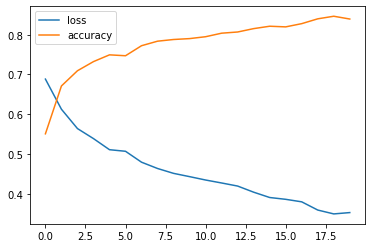

In [18]:
# training loss
pd1.plot()

<AxesSubplot:>

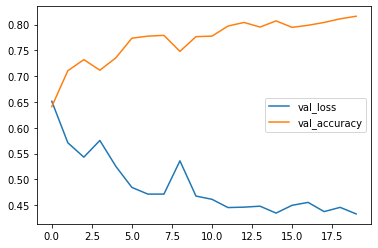

In [19]:
# validation loss
pd2.plot()

# 7 - Prediction

In [20]:
from tensorflow.keras.utils import load_img, img_to_array

In [29]:
# load image

test_image = load_img('dataset/single_prediction/cat_or_dog_3.jpg', target_size=(64, 64))

# convert the image into an array
test_image = img_to_array(test_image) # image should be in a batch
test_image = np.expand_dims(test_image, axis=0)

In [30]:
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    print("Prediction: DOG")
else:
    print("Prediction: CAT")

1/1 [==============================] - 0s 19ms/step
Prediction: DOG


In [26]:
# Save the model as h5 file
cnn.save('model.h5')